Arushi Nigam

In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import math
from sklearn.neighbors import DistanceMetric
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.tools.eval_measures import mse
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import statistics
from scipy.stats import bootstrap
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from imblearn.over_sampling import SMOTE 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn import tree
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection
from sklearn import preprocessing
from cmath import nan
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline



/Users/arushinigam/opt/anaconda3/envs/dsci552/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### 1(b)i.

In [2]:
warnings.filterwarnings('ignore')

apstraining = pd.read_csv("../data/aps_failure_training_set.csv")
headers = apstraining.columns[1:]
classestraining = apstraining[['class']]
apstraining = apstraining.drop(apstraining[['class']], axis=1)

apstest = pd.read_csv("../data/aps_failure_test_set.csv")
classestest = apstest[['class']]
apstest = apstest.drop(apstest[['class']], axis=1)

complete = apstraining.append(apstest)

for col in complete.columns:
    complete[col] = complete[col].replace(['na'], nan)
    complete[col] = complete[col].astype(float)

imputer = SimpleImputer(missing_values=nan, strategy='mean')
complete = pd.DataFrame(imputer.fit_transform(complete), columns=headers)

apstraining = complete[:60000]
apstest = complete[60000:]

for col in classestraining.columns:
    classestraining[col] = classestraining[col].replace(['neg'], 0)
    classestraining[col] = classestraining[col].replace(['pos'], 1)

for col in classestest.columns:
    classestest[col] = classestest[col].replace(['neg'], 0)
    classestest[col] = classestest[col].replace(['pos'], 1)

### 1(b)ii.

In [3]:
CVs = []
for col in complete.columns:
    std = complete[col].std()
    mean = complete[col].mean()
    cvscore = std/mean
    CVs.append((cvscore, col))
CVs.sort(reverse=True)

### 1(b)iii.

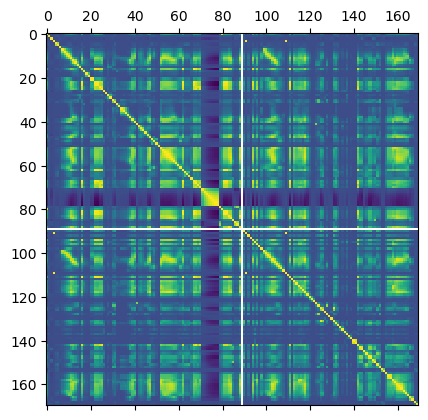

In [4]:
coeffmatrix = complete.corr()
plt.matshow(coeffmatrix)
plt.show()

### 1(b)iv.

It is difficult to draw conclusions about the significance of the datasets
just from the scatterplots alone as the dots in the plots are far and very few making it difficult to see and analyze.


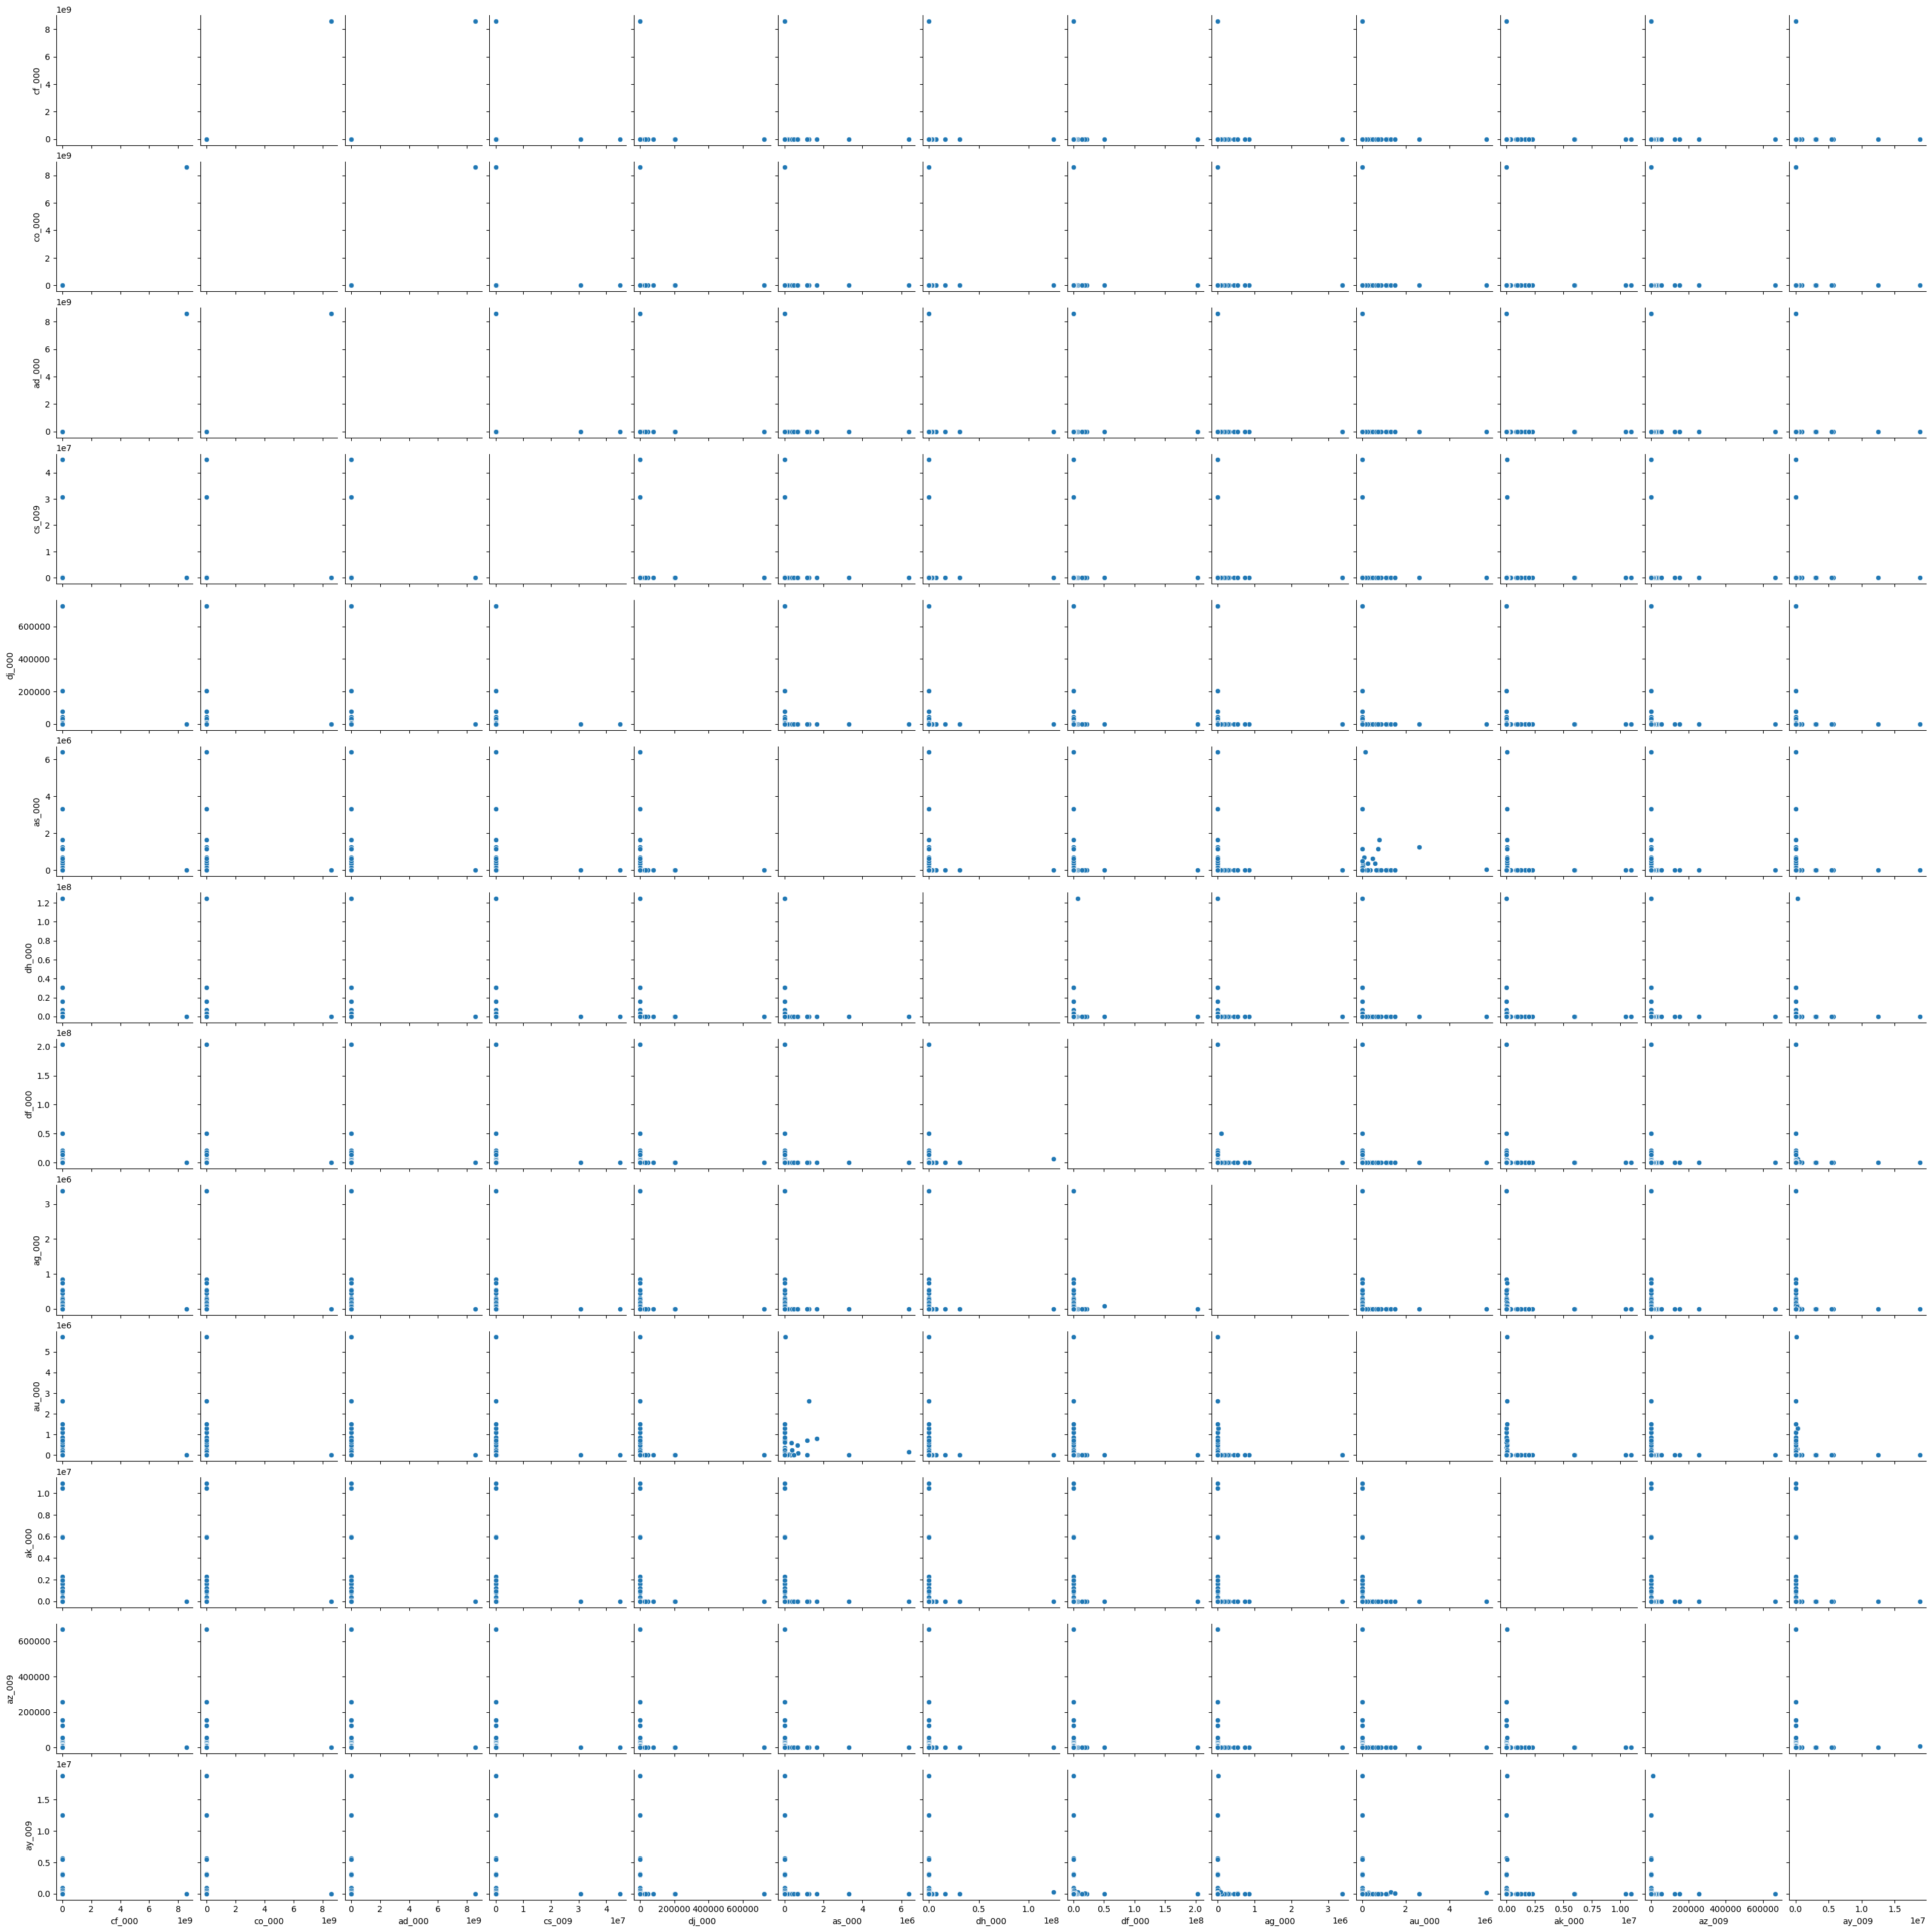

In [5]:
highestcols = [];
for i in range(13):
    col = CVs[i][1]
    highestcols.append(complete[col])

highestdf = pd.DataFrame(highestcols).T
print("It is difficult to draw conclusions about the significance of the datasets")
print("just from the scatterplots alone as the dots in the plots are far and very few making it difficult to see and analyze.")
sns.pairplot(data=highestdf, diag_kind='none')
plt.show(sns)


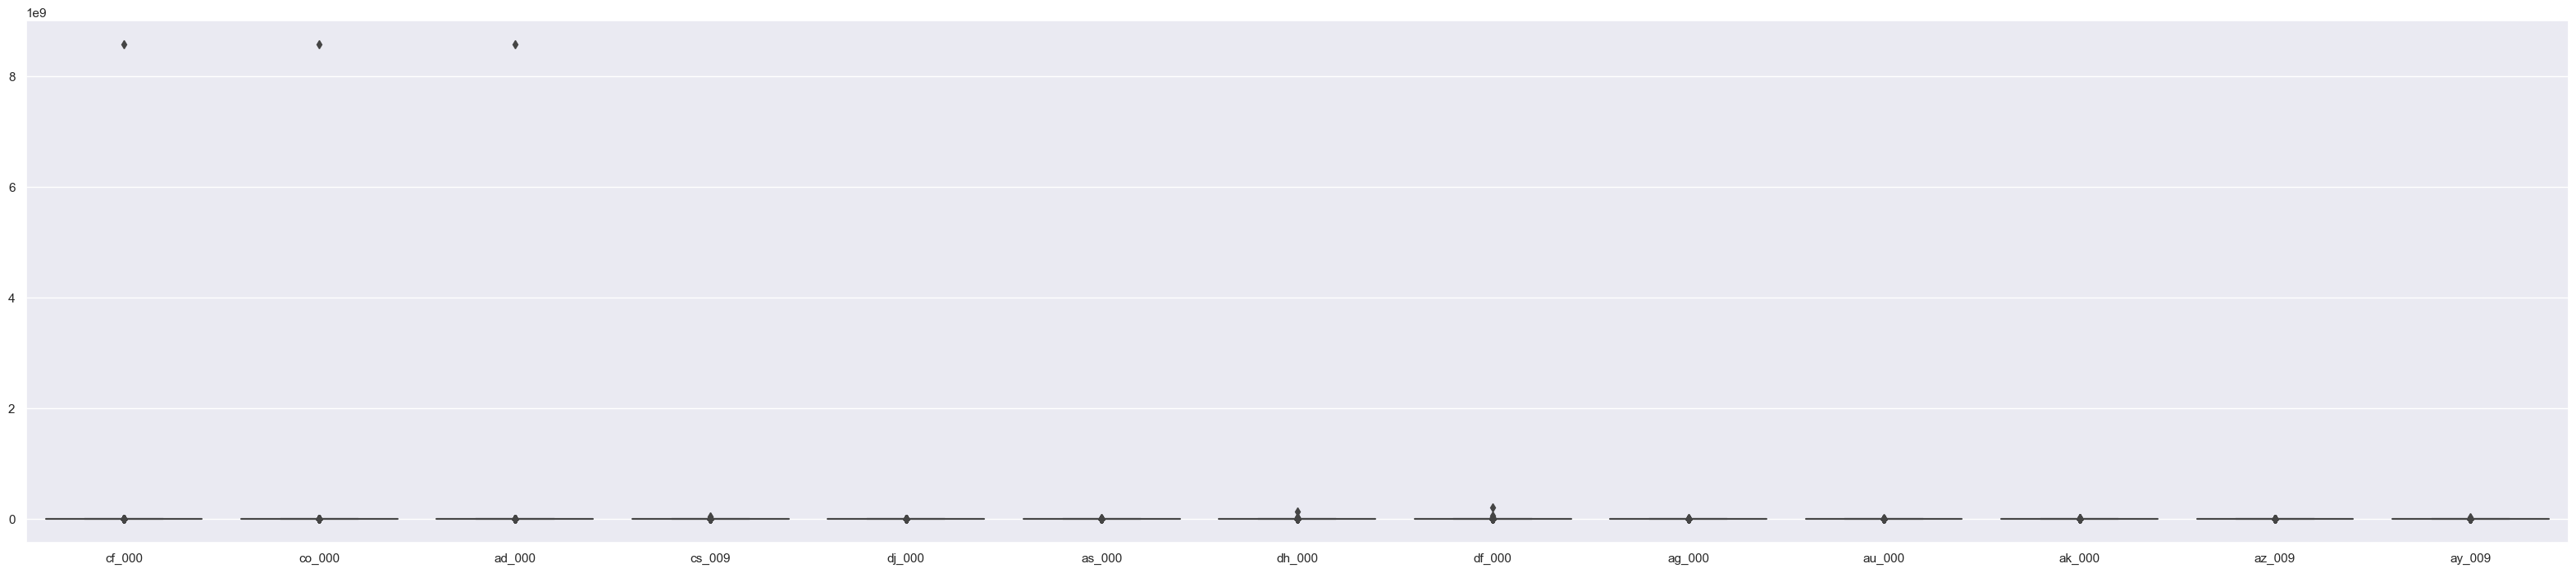

In [7]:
sns.boxplot(data=highestdf)
sns.set(rc={'figure.figsize':(40,8.27)})
plt.show(sns)

### 1(b)v.

In [8]:
print("Training Counts")
print(classestraining['class'].value_counts())
print("Testing Counts")
print(classestest['class'].value_counts())
print("")
print("This dataset is imbalanced.")

Training Counts
0    59000
1     1000
Name: class, dtype: int64
Testing Counts
0    15625
1      375
Name: class, dtype: int64

This dataset is imbalanced.


### 1(c).

For training set:


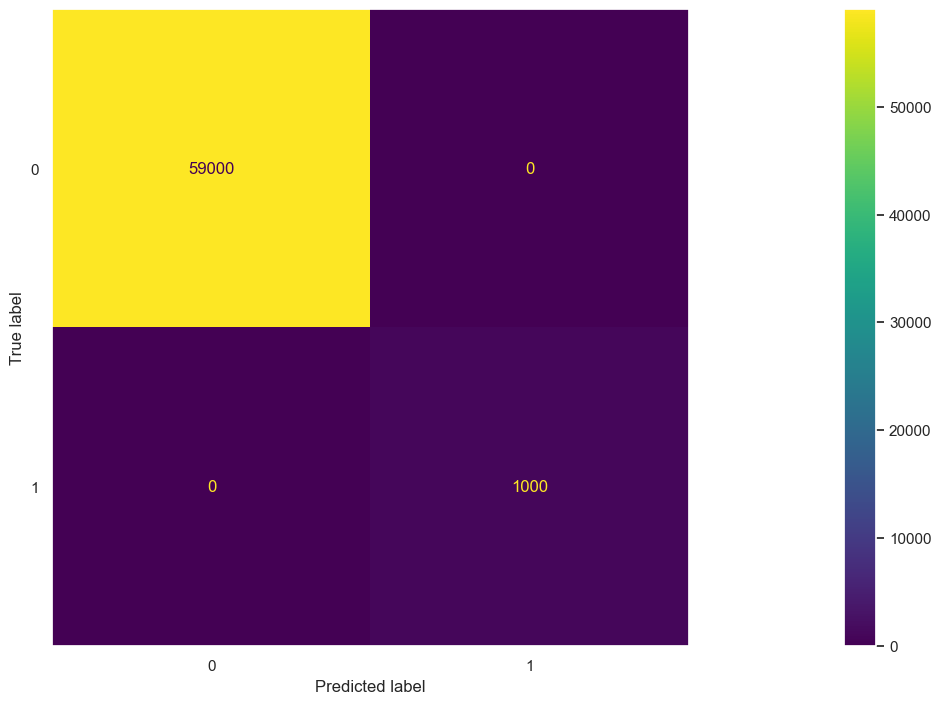

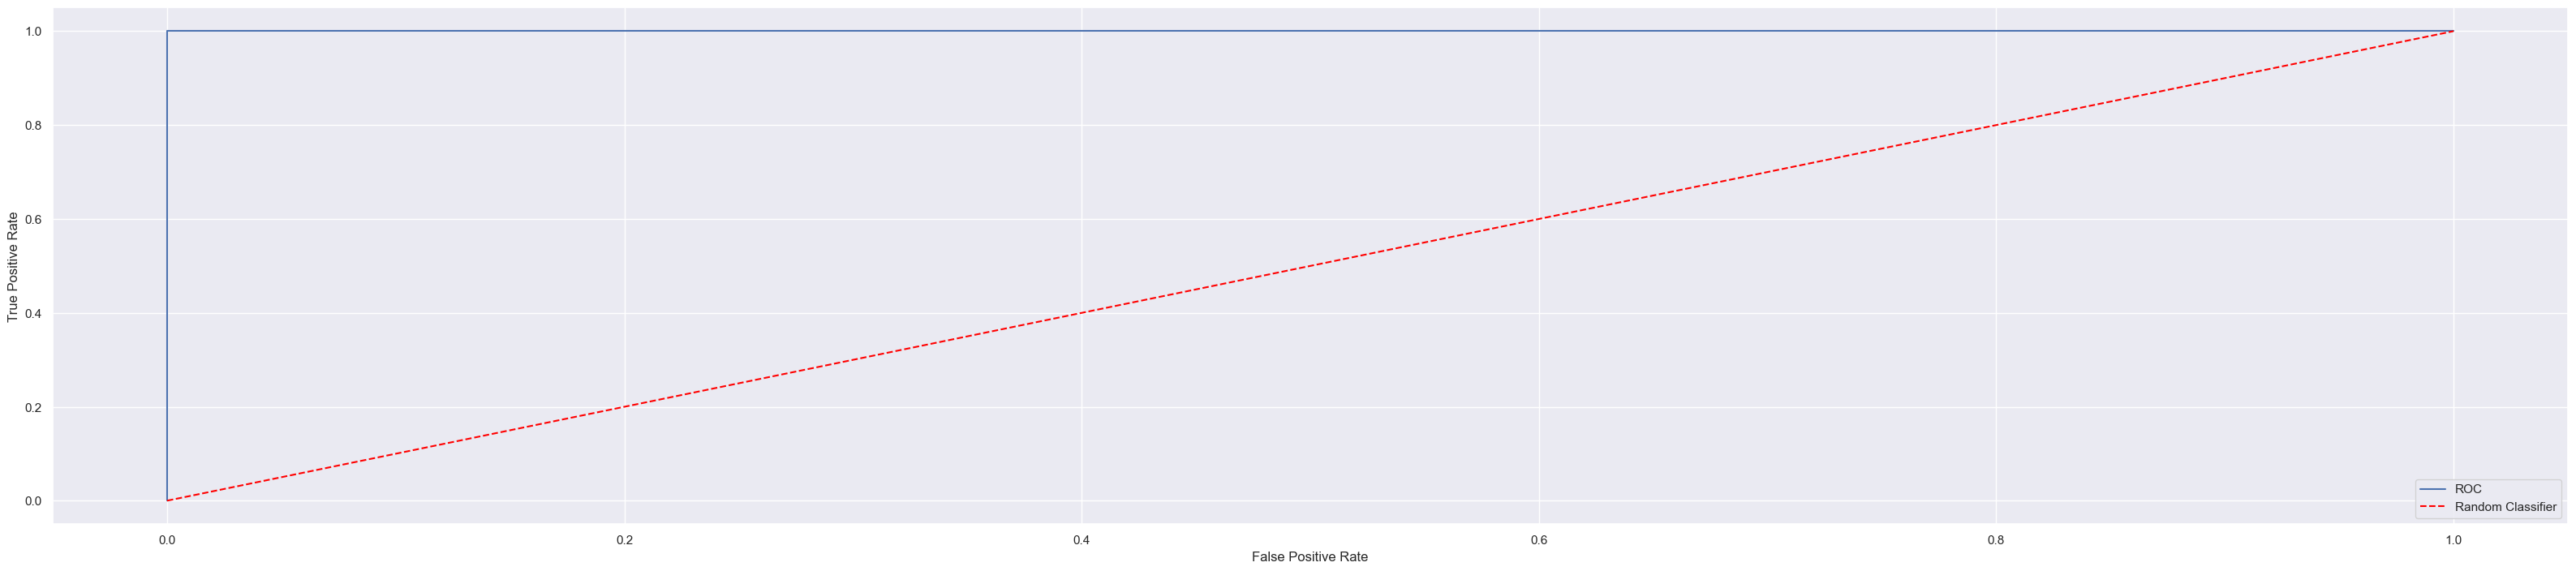

AUC Score: 1.0
Misclassifcation Rate: 0.0
Out-of-Bag Error: 0.00601666666666667

For testing set:


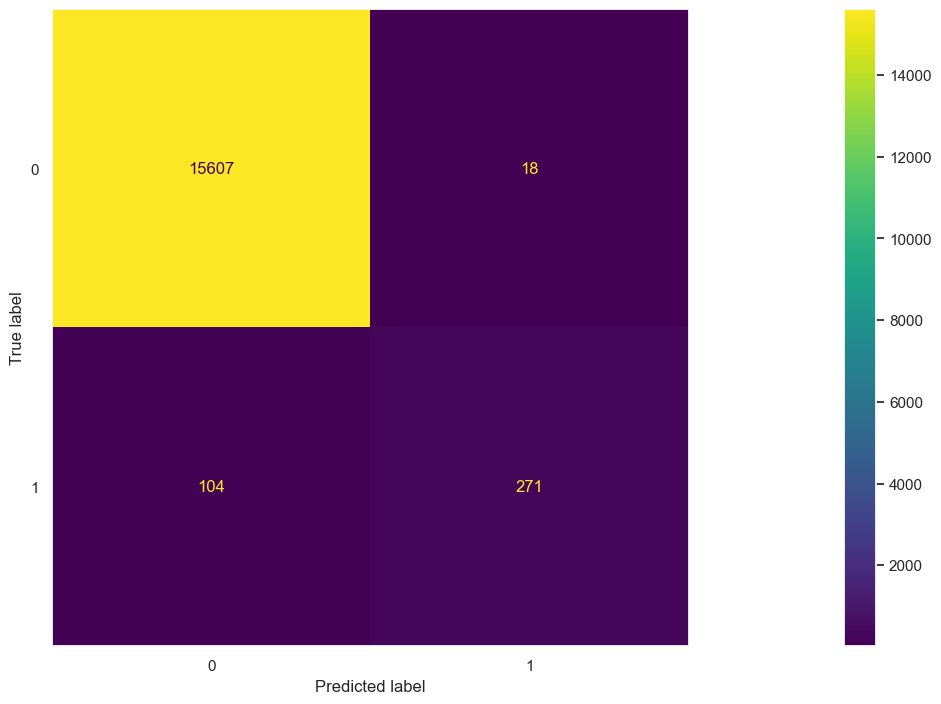

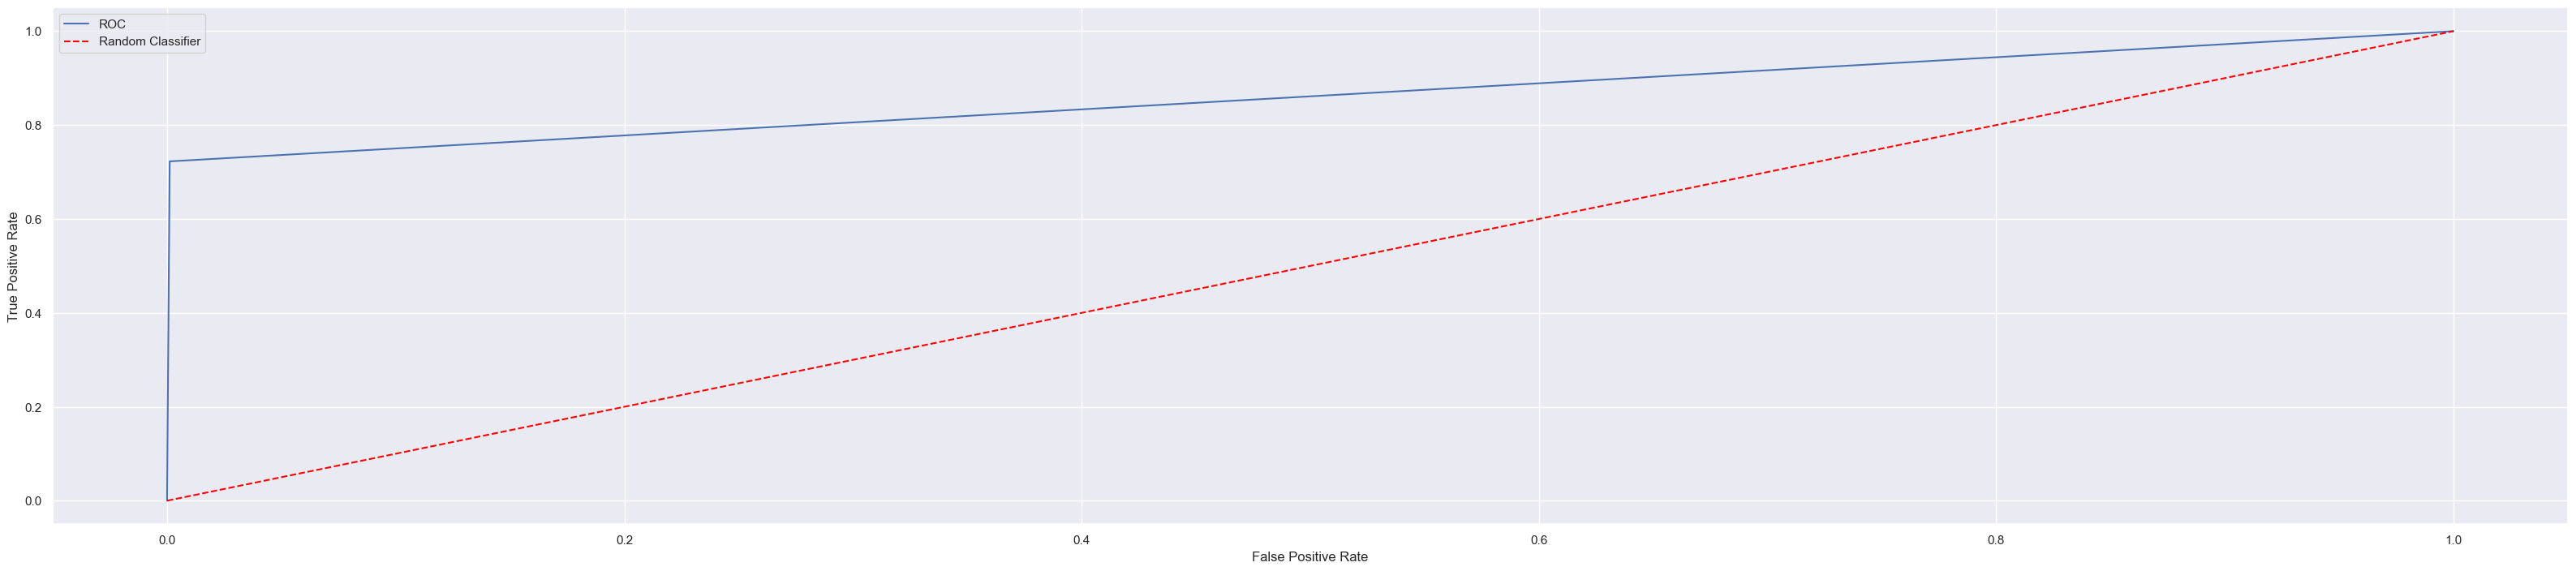

AUC Score: 0.8607573333333332
Misclassifcation Rate: 0.007624999999999993
Out-of-Bag Error: 0.006066666666666665

The test error is lower than OOB error for the training set.
The test error is higher than OOB error for the test set.


In [9]:
rf = RandomForestClassifier(oob_score=True)
rf.fit(apstraining, classestraining)

# ---------- Training Set --------------
print("For training set:")
ytrainpredict = rf.predict(apstraining)

# Confusion Matrix
cmatrix = metrics.confusion_matrix(classestraining, ytrainpredict)
cmatrixdisp = metrics.ConfusionMatrixDisplay(confusion_matrix=cmatrix)
cmatrixdisp.plot()
plt.grid(False)
plt.show()

#ROC Curve
fp, tp, _ = roc_curve(classestraining, ytrainpredict)
roc_display = RocCurveDisplay(fpr=fp, tpr=tp).plot(label='ROC')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
plt.legend()
plt.show(roc_display)

#AUC Score
print("AUC Score:", roc_auc_score(classestraining, ytrainpredict))

#Misclassification Rate
print("Misclassifcation Rate:", 1-accuracy_score(classestraining, ytrainpredict))

#OOB Error
print("Out-of-Bag Error:", 1-rf.oob_score_)

# ---------- Testing Set --------------
rft = RandomForestClassifier(oob_score=True)
rft.fit(apstraining, classestraining)

print("")
print("For testing set:")
ytestpredict = rft.predict(apstest)

# Confusion Matrix
cmatrix = metrics.confusion_matrix(classestest, ytestpredict)
cmatrixdisp = metrics.ConfusionMatrixDisplay(confusion_matrix=cmatrix)
cmatrixdisp.plot()
plt.grid(False)
plt.show()

#ROC Curve
fp, tp, _ = roc_curve(classestest, ytestpredict)
roc_display = RocCurveDisplay(fpr=fp, tpr=tp).plot(label='ROC')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
plt.legend()
plt.show(roc_display)

#AUC Score
print("AUC Score:", roc_auc_score(classestest, ytestpredict))

#Misclassification Rate
print("Misclassifcation Rate:", 1-accuracy_score(classestest, ytestpredict))

#OOB Error
print("Out-of-Bag Error:", 1-rft.oob_score_)

print("")
print("The test error is lower than OOB error for the training set.")
print("The test error is higher than OOB error for the test set.")


### 1(d).

For training set:


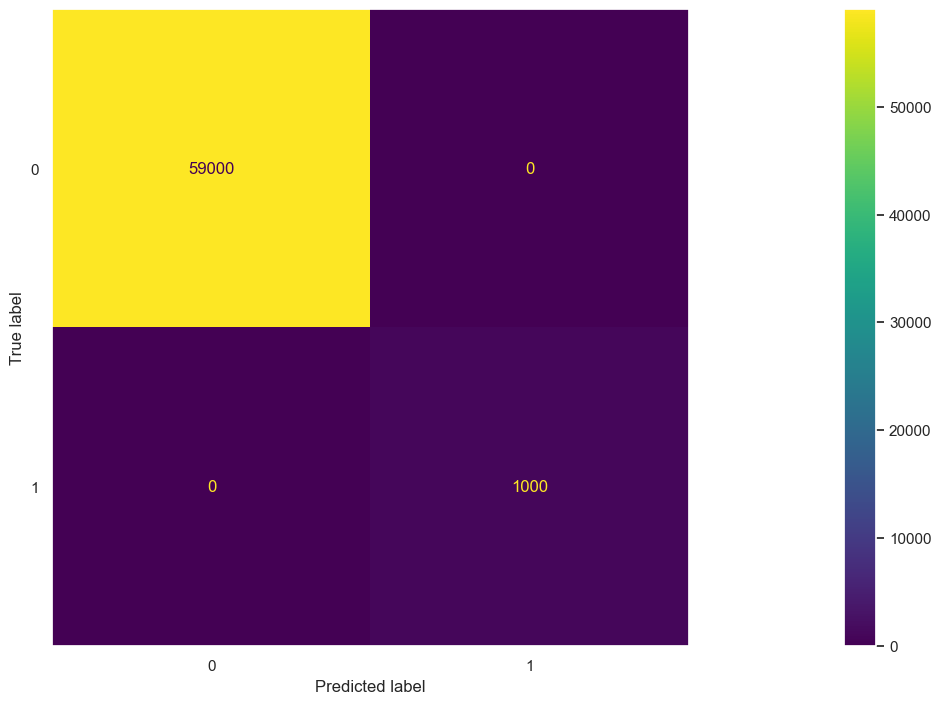

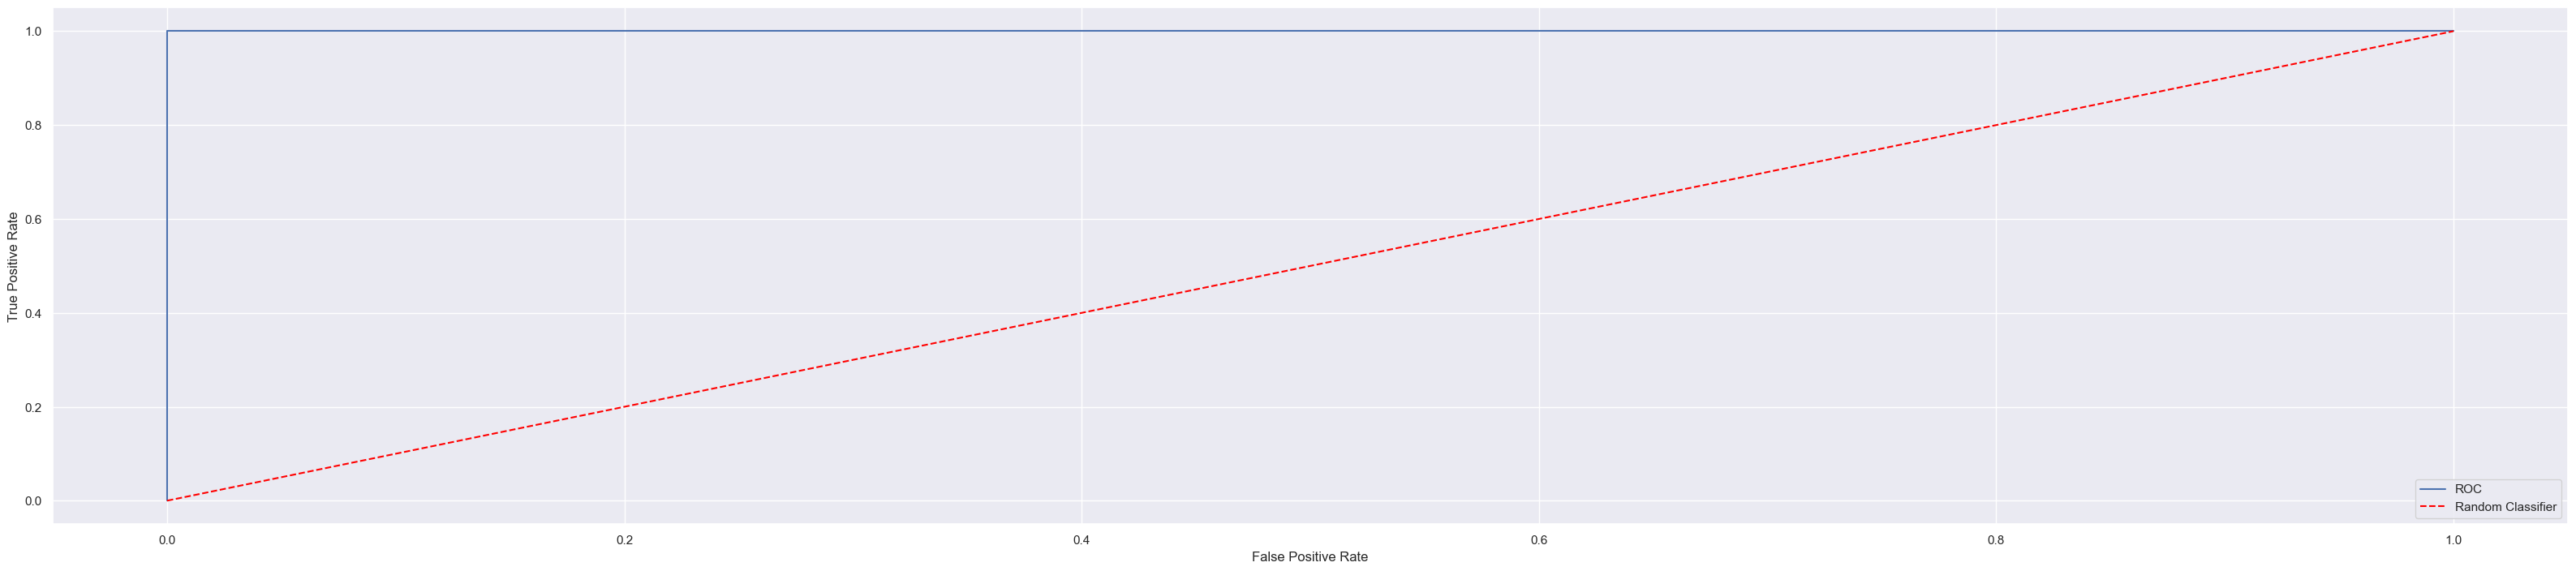

AUC Score: 1.0
Misclassifcation Rate: 0.0
Out-of-Bag Error: 0.0074666666666666215

For testing set:


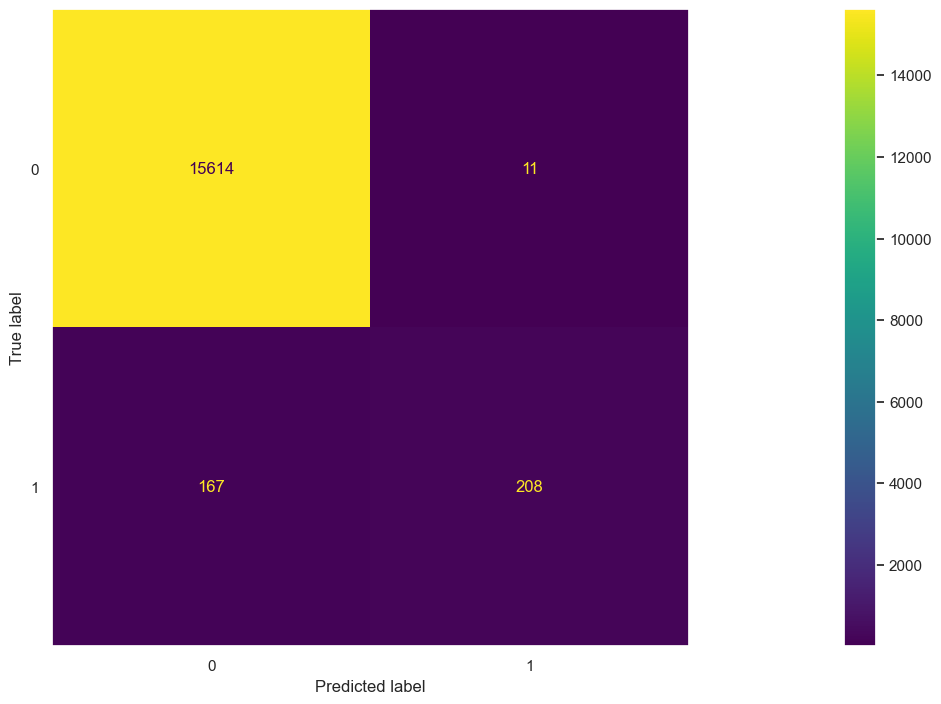

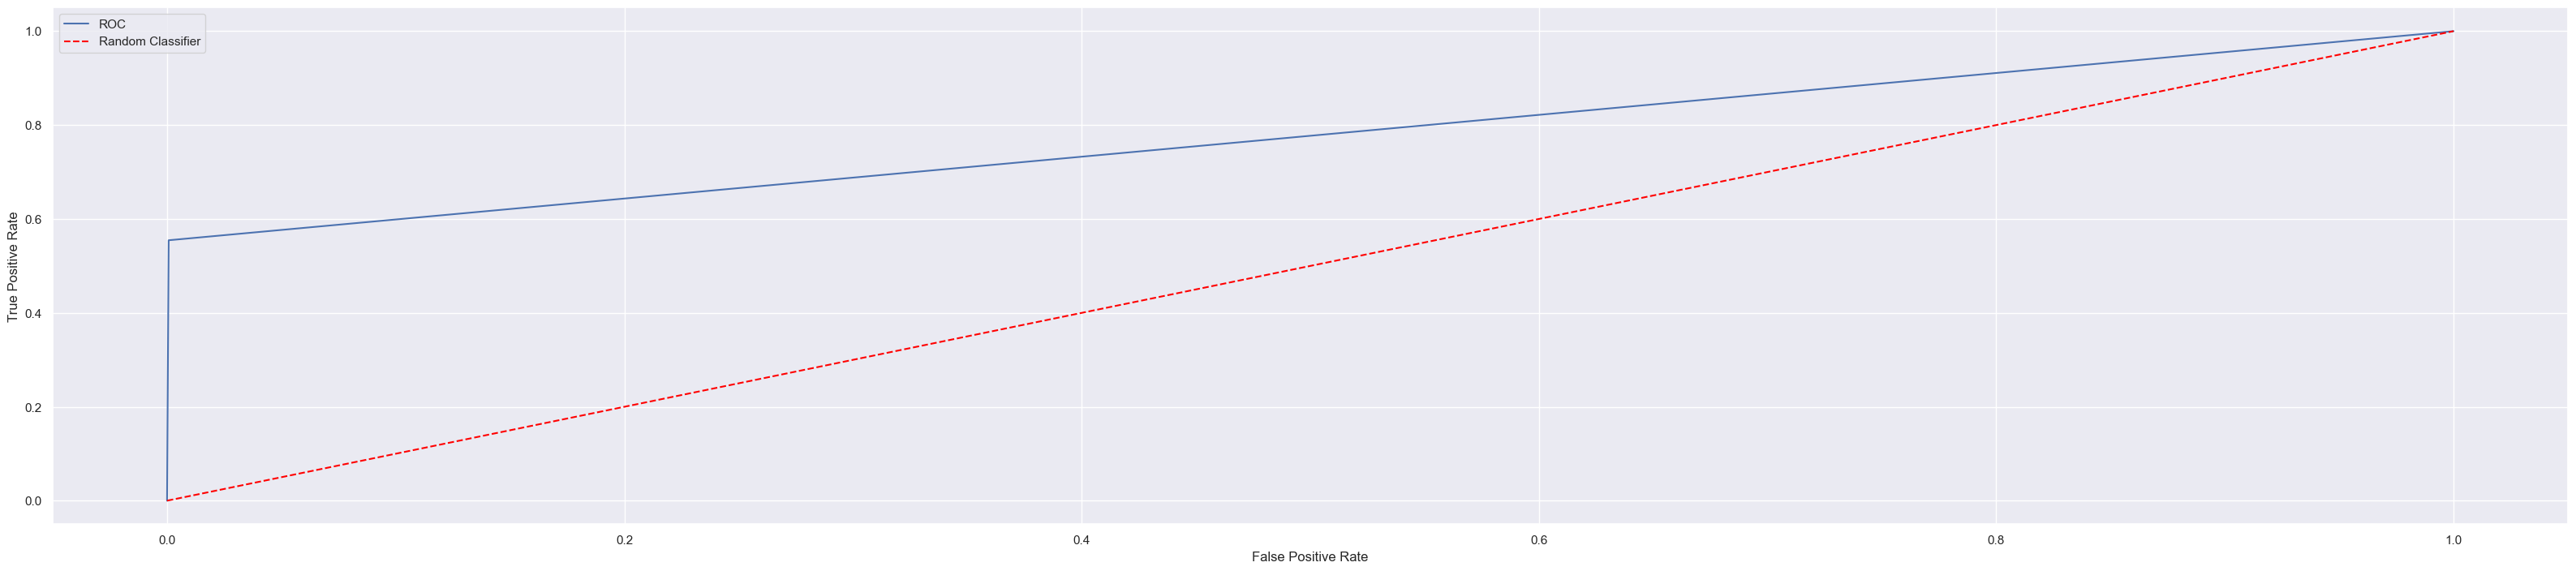

AUC Score: 0.7769813333333333
Misclassifcation Rate: 0.011125000000000052
Out-of-Bag Error: 0.007800000000000029

After trying to fix the imbalance, there is a higher out of bag error for the training set compared to leaving the imbalance alone.
The AUC and misclassification rate are lower, especially the misclassification rate.
For the testing set after trying to fix the imbalance, the out of bag error is also higher than before.
The AUC and the misclassification rate are lower, especially the misclassification rate.


In [10]:
rf = RandomForestClassifier(oob_score=True, class_weight="balanced")
rf.fit(apstraining, classestraining)

# ---------- Training Set --------------
print("For training set:")
ytrainpredict = rf.predict(apstraining)

# Confusion Matrix
cmatrix = metrics.confusion_matrix(classestraining, ytrainpredict)
cmatrixdisp = metrics.ConfusionMatrixDisplay(confusion_matrix=cmatrix)
cmatrixdisp.plot()
plt.grid(False)
plt.show()

#ROC Curve
fp, tp, _ = roc_curve(classestraining, ytrainpredict)
roc_display = RocCurveDisplay(fpr=fp, tpr=tp).plot(label='ROC')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
plt.legend()
plt.show(roc_display)

#AUC Score
print("AUC Score:", roc_auc_score(classestraining, ytrainpredict))

#Misclassification Rate
print("Misclassifcation Rate:", 1-accuracy_score(classestraining, ytrainpredict))

#OOB Error
print("Out-of-Bag Error:", 1-rf.oob_score_)

# ---------- Testing Set --------------
rft = RandomForestClassifier(oob_score=True, class_weight='balanced')
rft.fit(apstraining, classestraining)

print("")
print("For testing set:")
ytestpredict = rft.predict(apstest)

# Confusion Matrix
cmatrix = metrics.confusion_matrix(classestest, ytestpredict)
cmatrixdisp = metrics.ConfusionMatrixDisplay(confusion_matrix=cmatrix)
cmatrixdisp.plot()
plt.grid(False)
plt.show()

#ROC Curve
fp, tp, _ = roc_curve(classestest, ytestpredict)
roc_display = RocCurveDisplay(fpr=fp, tpr=tp).plot(label='ROC')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
plt.legend()
plt.show(roc_display)

#AUC Score
print("AUC Score:", roc_auc_score(classestest, ytestpredict))

#Misclassification Rate
print("Misclassifcation Rate:", 1-accuracy_score(classestest, ytestpredict))

#OOB Error
print("Out-of-Bag Error:", 1-rft.oob_score_)

print("")
print("After trying to fix the imbalance, there is a higher out of bag error for the training set compared to leaving the imbalance alone.")
print("The AUC and misclassification rate are lower, especially the misclassification rate.")
print("For the testing set after trying to fix the imbalance, the out of bag error is also higher than before.")
print("The AUC and the misclassification rate are lower, especially the misclassification rate.")

### 1(e).

In [11]:
parameters = {'reg_alpha':[1,2,3,4]}
xgbmodel = xgb.XGBClassifier(verbosity=0)
model = GridSearchCV(xgbmodel, parameters, cv=5)
model.fit(apstraining, classestraining)

print("Best alpha:", model.best_params_["reg_alpha"])

Best alpha: 2


In [12]:
#Training error
score5 = cross_val_score(model, apstraining, classestraining, cv=5).mean()
print("")
print("Cross-validation training error:", score5)


Cross-validation training error: 0.9945166666666667


For training set:


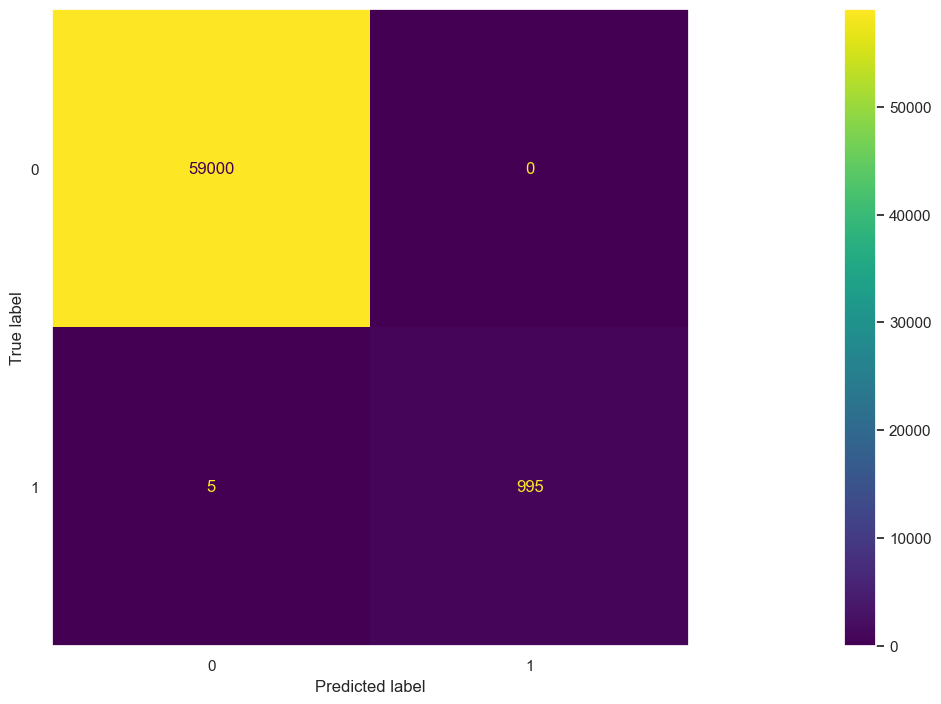

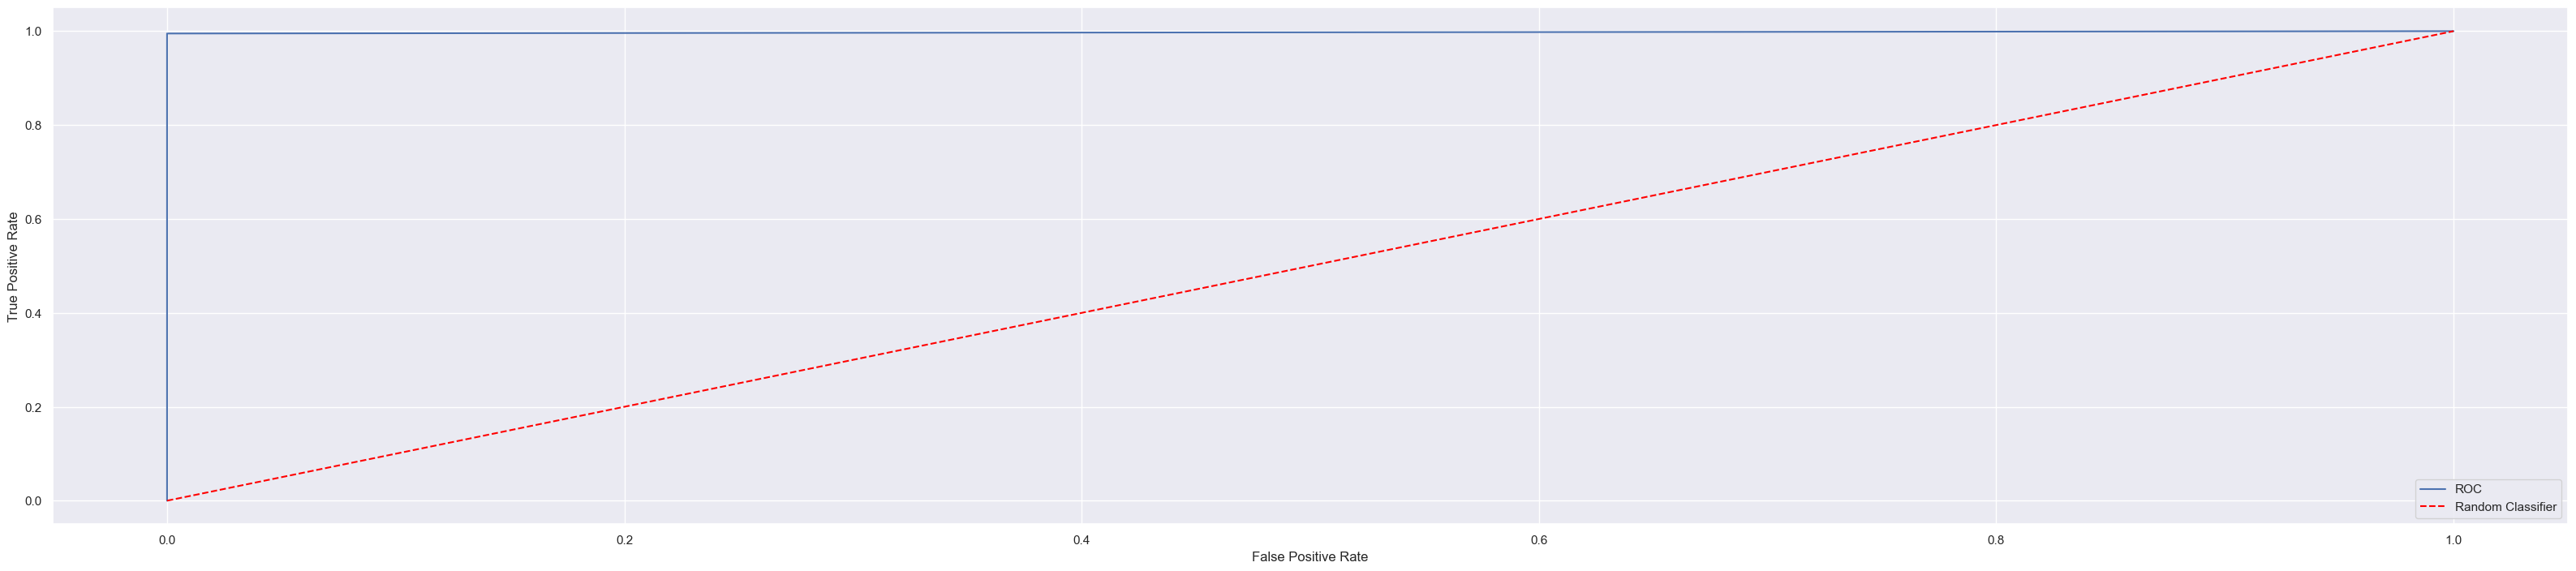

AUC Score: 0.9975
Misclassifcation Rate: 8.333333333332416e-05

For testing set:


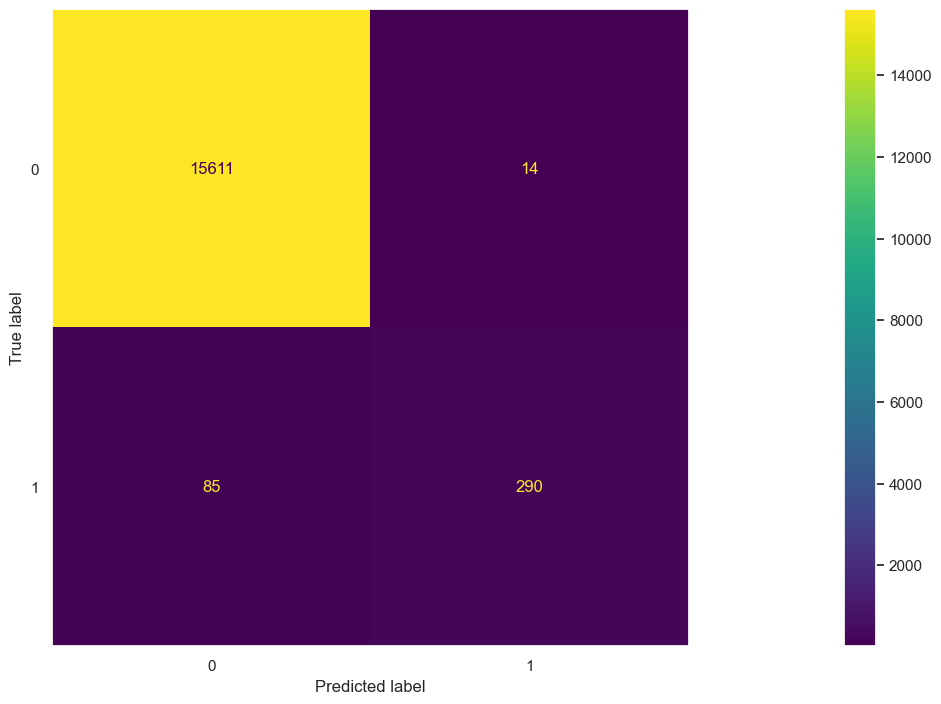

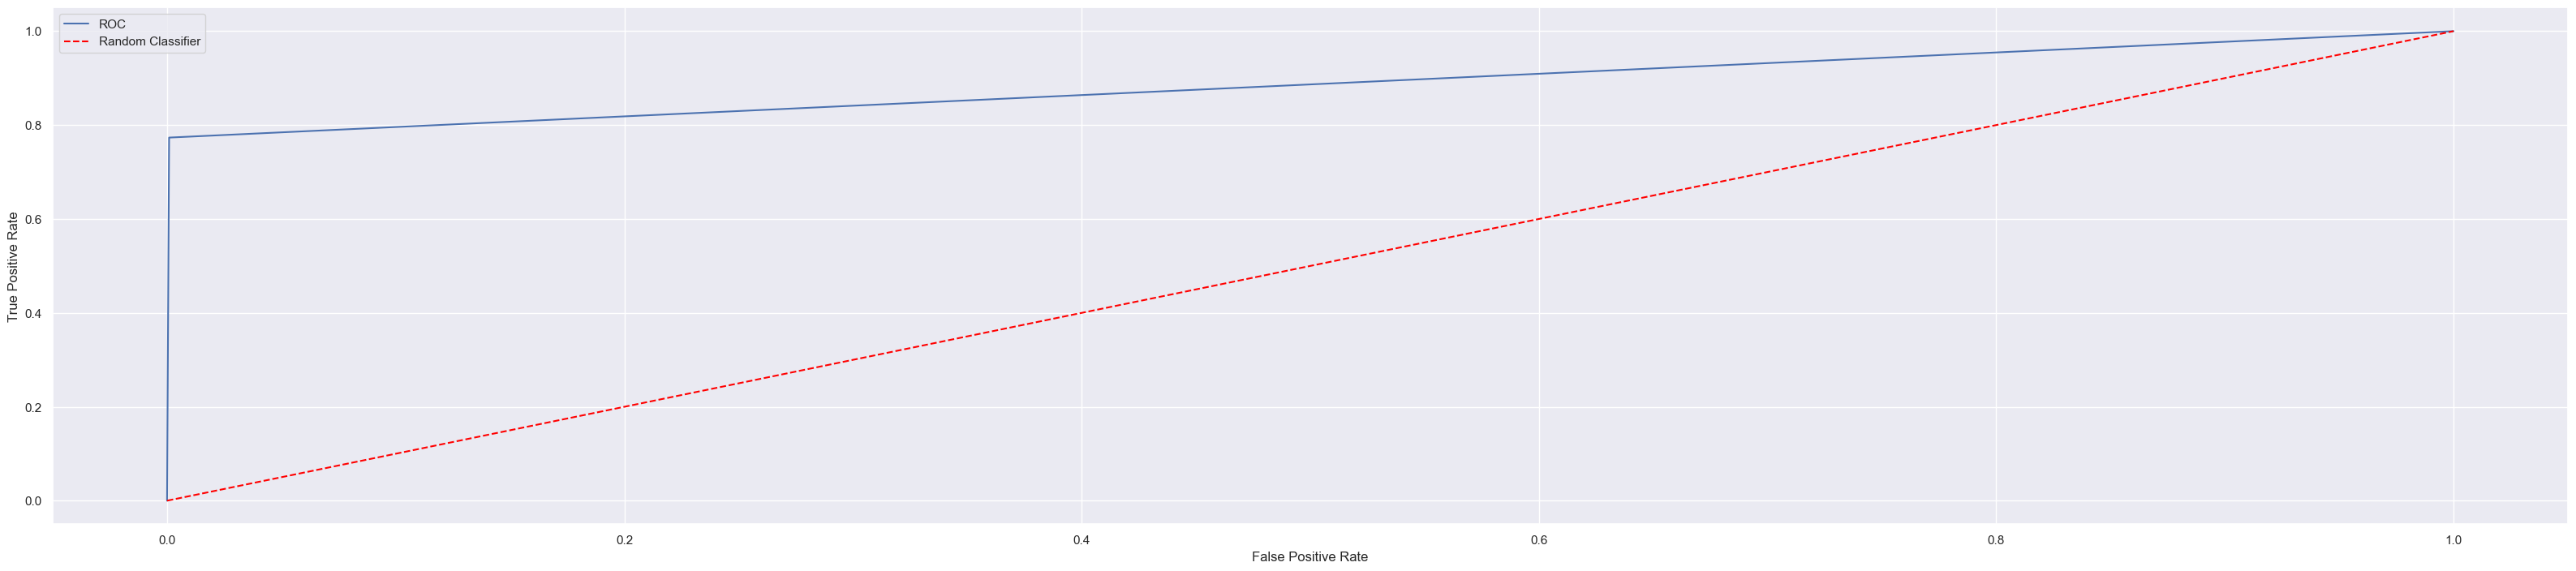

AUC Score: 0.8862186666666667
Misclassifcation Rate: 0.0061875000000000124


In [14]:
# from xgboost import XGBClassifier

# modelx = XGBClassifier(reg_alpha=bestalpha, verbosity=0) #reg_alpha=bestalpha
# modelx.fit(apstraining, classestraining)

resultstrain = model.predict(apstraining)
resultstest = model.predict(apstest)

# ---------- Training Set --------------
print("For training set:")

# Confusion Matrix
cmatrix = metrics.confusion_matrix(classestraining, resultstrain)
cmatrixdisp = metrics.ConfusionMatrixDisplay(confusion_matrix=cmatrix)
cmatrixdisp.plot()
plt.grid(False)
plt.show()

#ROC Curve
fp, tp, _ = roc_curve(classestraining, resultstrain)
roc_display = RocCurveDisplay(fpr=fp, tpr=tp).plot(label='ROC')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
plt.legend()
plt.show(roc_display)

#AUC Score
print("AUC Score:", roc_auc_score(classestraining, resultstrain))

#Misclassification Rate
print("Misclassifcation Rate:", 1-accuracy_score(classestraining, resultstrain))

# ---------- Testing Set --------------

print("")
print("For testing set:")

# Confusion Matrix
cmatrix = metrics.confusion_matrix(classestest, resultstest)
cmatrixdisp = metrics.ConfusionMatrixDisplay(confusion_matrix=cmatrix)
cmatrixdisp.plot()
plt.grid(False)
plt.show()

#ROC Curve
fp, tp, _ = roc_curve(classestest, resultstest)
roc_display = RocCurveDisplay(fpr=fp, tpr=tp).plot(label='ROC')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
plt.legend()
plt.show(roc_display)

#AUC Score
print("AUC Score:", roc_auc_score(classestest, resultstest))

#Misclassification Rate
print("Misclassifcation Rate:", 1-accuracy_score(classestest, resultstest))


The cross validation error with 5 fold is much higher than the test error for the training set.
The cross validation error with 5 fold is much higher than the test error for the testing set.

### 1(f).

In [16]:
pline = imbpipeline(steps = [['SMOTE', SMOTE(random_state=0)],['model', xgb.XGBClassifier(verbosity=0)]])
parameters = {'model__reg_alpha':[1,2,3,4]}
gsearchCV = GridSearchCV(estimator=pline, param_grid=parameters, cv=5)
gsearchCV.fit(apstraining, classestraining)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[['SMOTE', SMOTE(random_state=0)],
                                       ['model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None,
                                                      reg_alpha=None,
                                                      reg_lambda=None,
                                                      scale_pos_weight=None,
                                                      subsample=None,
                                                      tree_method=None,
                                                      validate_parameters=None,
                                                      verbosity=0)]]),
             param_grid={'model__reg_alpha': [1, 2, 3, 4]})

In [18]:
print("Best alpha:", gsearchCV.best_params_["model__reg_alpha"])

Best alpha: 2


In [19]:
#Training error
score5 = cross_val_score(gsearchCV, apstraining, classestraining, cv=5).mean()
print("")
print("Cross-validation training error:", score5)


Cross-validation training error: 0.9933833333333333


For training set:


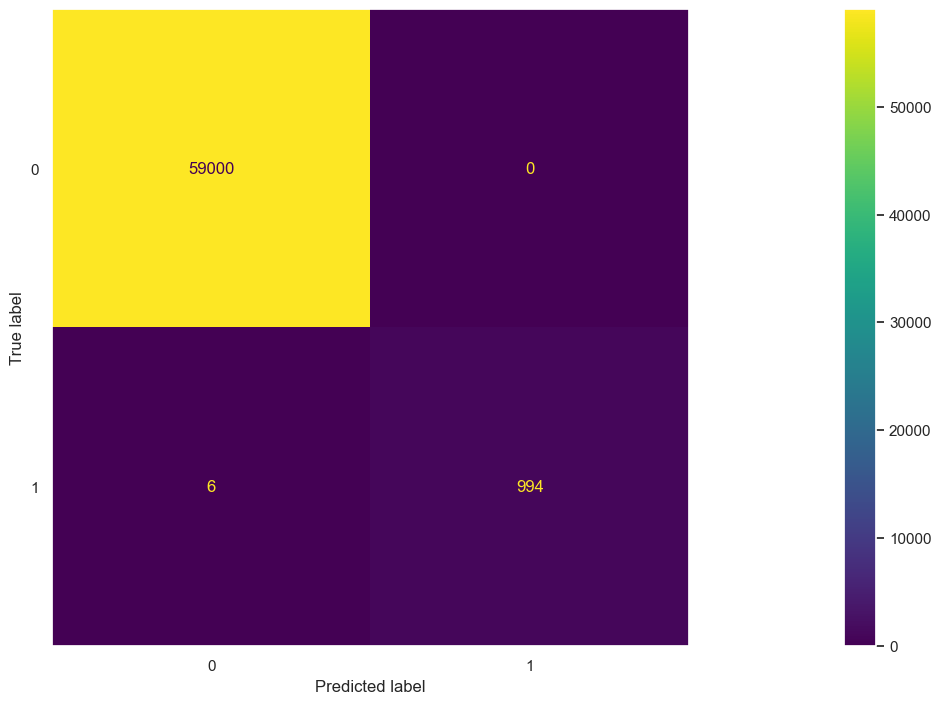

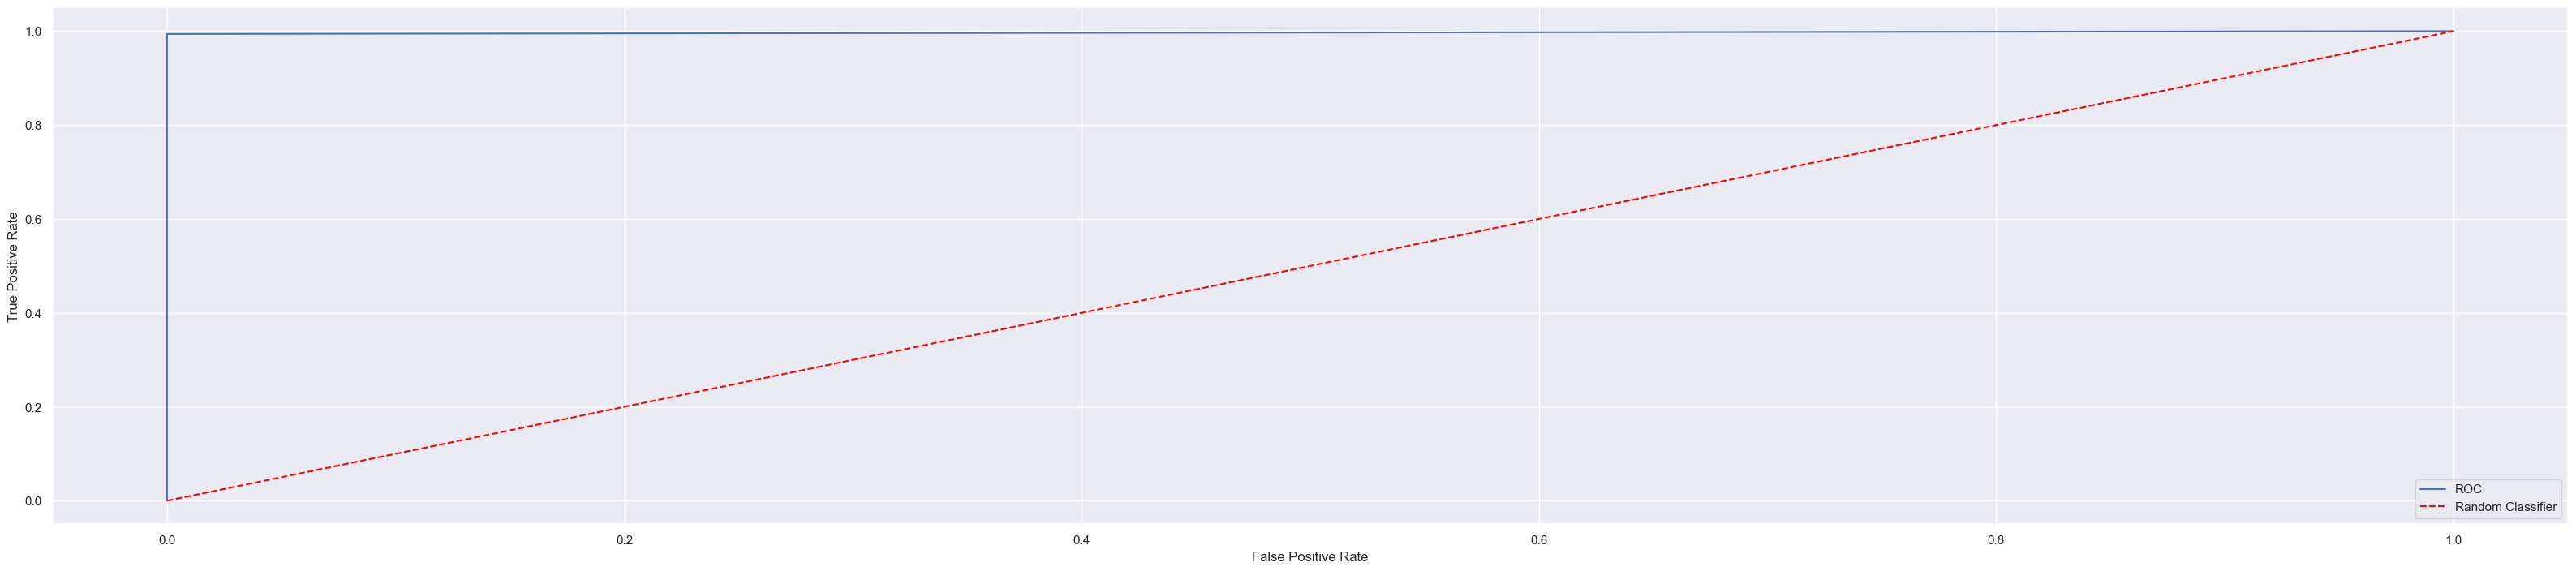

AUC Score: 0.997
Misclassifcation Rate: 9.999999999998899e-05

For testing set:


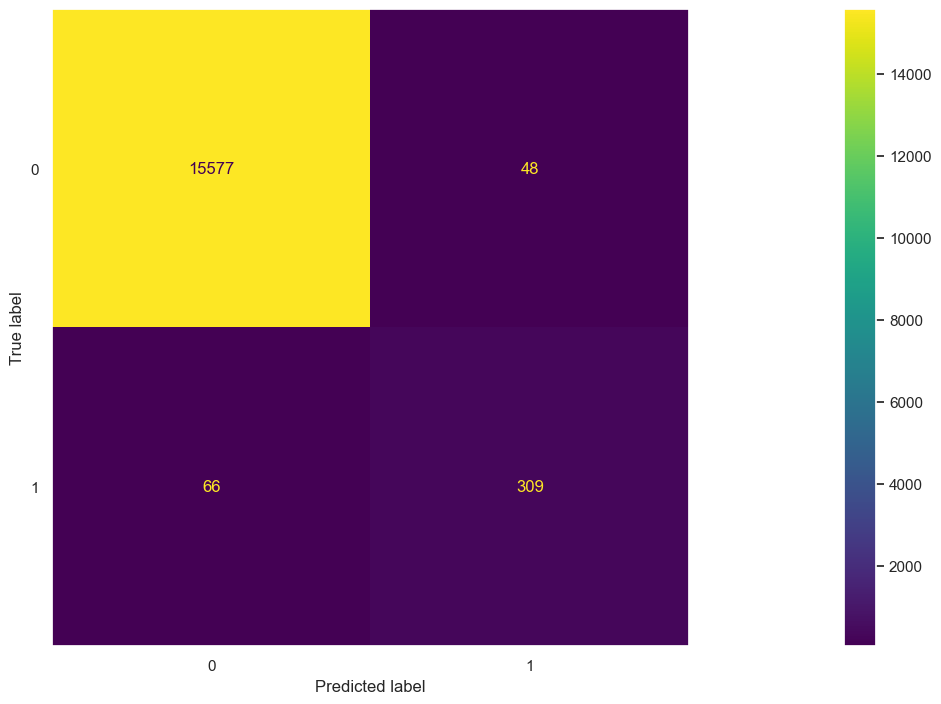

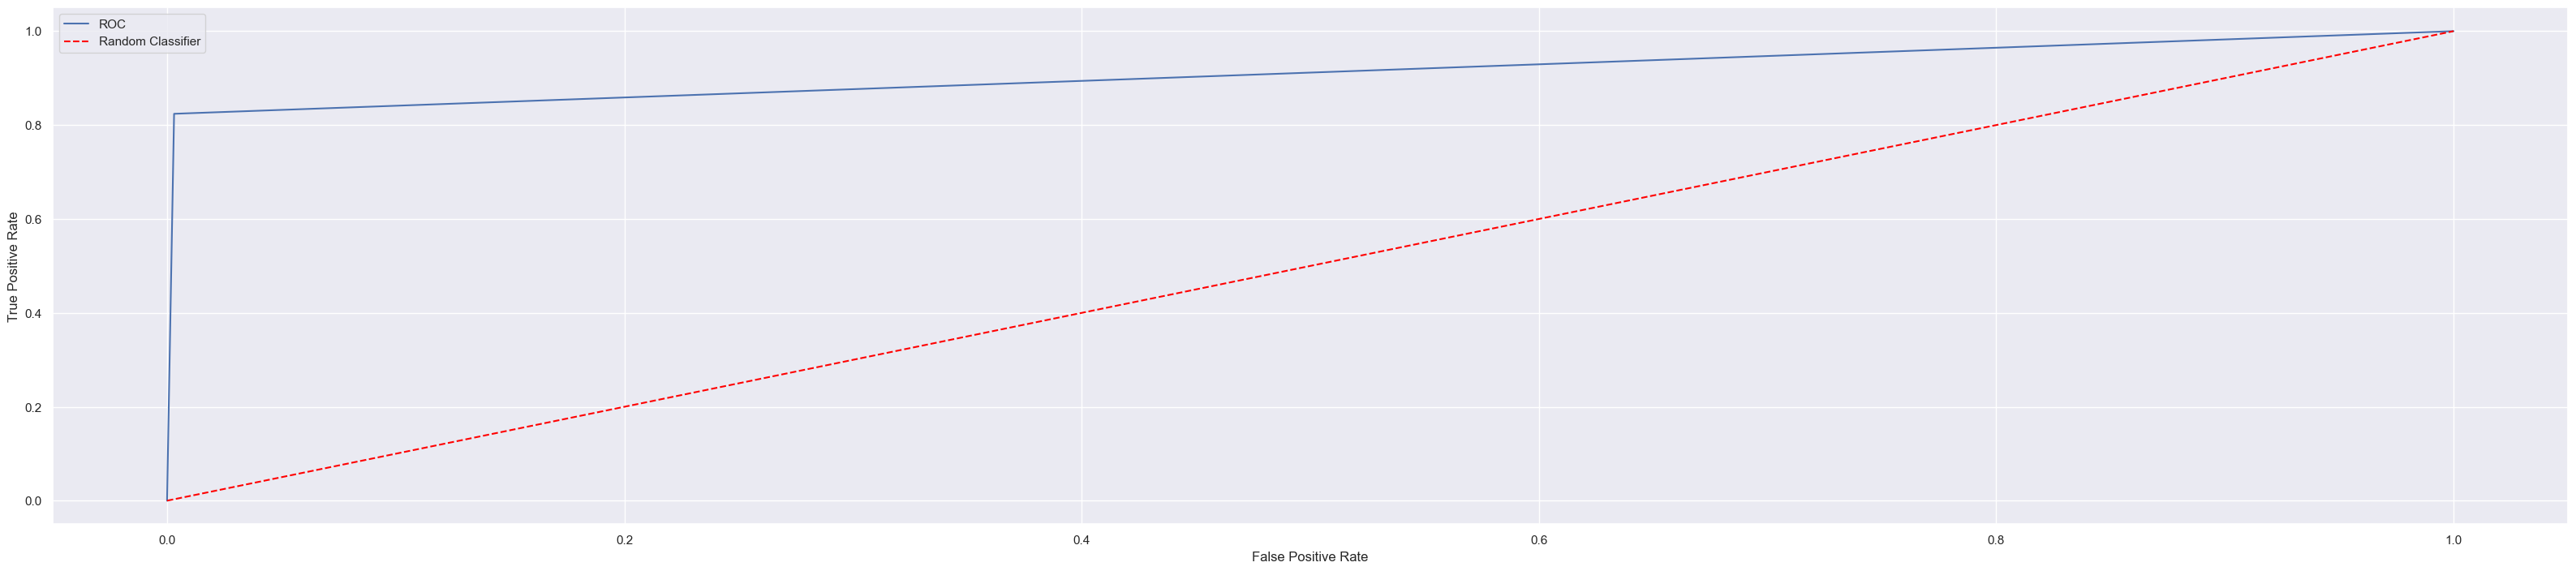

AUC Score: 0.910464
Misclassifcation Rate: 0.007125000000000048


In [21]:
resultstrainsmote = gsearchCV.predict(apstraining)
resultstestsmote = gsearchCV.predict(apstest)

# ---------- Training Set --------------
print("For training set:")

# Confusion Matrix
cmatrix = metrics.confusion_matrix(classestraining, resultstrainsmote)
cmatrixdisp = metrics.ConfusionMatrixDisplay(confusion_matrix=cmatrix)
cmatrixdisp.plot()
plt.grid(False)
plt.show()

#ROC Curve
fp, tp, _ = roc_curve(classestraining, resultstrainsmote)
roc_display = RocCurveDisplay(fpr=fp, tpr=tp).plot(label='ROC')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
plt.legend()
plt.show(roc_display)

#AUC Score
print("AUC Score:", roc_auc_score(classestraining, resultstrainsmote))

#Misclassification Rate
print("Misclassifcation Rate:", 1-accuracy_score(classestraining, resultstrainsmote))

# ---------- Testing Set --------------

print("")
print("For testing set:")

# Confusion Matrix
cmatrix = metrics.confusion_matrix(classestest, resultstestsmote)
cmatrixdisp = metrics.ConfusionMatrixDisplay(confusion_matrix=cmatrix)
cmatrixdisp.plot()
plt.grid(False)
plt.show()

#ROC Curve
fp, tp, _ = roc_curve(classestest, resultstestsmote)
roc_display = RocCurveDisplay(fpr=fp, tpr=tp).plot(label='ROC')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
plt.legend()
plt.show(roc_display)

#AUC Score
print("AUC Score:", roc_auc_score(classestest, resultstestsmote))

#Misclassification Rate
print("Misclassifcation Rate:", 1-accuracy_score(classestest, resultstestsmote))

The cross validation error with 5 fold is much higher than the test error for the training set.
The cross validation error with 5 fold is much higher than the test error for the testing set.
When compared to the non-SMOTE case, the training set in both cases are very similar in terms of their errors.
In the SMOTE case they are slightly higher, but not drastically different.
In the test case, the SMOTE case has a higher AUC score, cross-validation training error, as well as test error
when compared to the non-SMOTE case.

### 2.)

a.) Steadily decrease because as we are loosening the contstraint so the the model is becoming more flexible therefore increasing the chances of overfitting.

b.) Decrease initially, and then eventually start increasing in a U shape because as the model fits better in the beginning, the test RSS will go down, but once overfitting starts to happen, the test RSS will go up.

c.) Steadily increase because as the model becomes more flexible due to the loosening of the constraint, the variance will increase as well.

d.) Steadily decrease because as the model becomes more flexible due to the loosening of the constraint, the variance will go up, which means the bias will go down.

e.) Remain constant because irreducible error is not influenced by changes in the model.

### 3.)

The answer is a PDF in the folder.

### 4.)

When going the majority route, 0.75, 0.7, 0.65, 0.6, 0.6, 0.55 are in the red category while 0.1,0.15,0.2,0.2 are green, which means X would be red. 
When going the average route, adding up all of the probabilites and dividing by 10, the answer is (0.1+0.15+0.2+0.2+0.55+0.6+0.6+0.65+0.7+0.75)/10 = 0.45. This would classify X as the green class.

### 5.)

The answer is a PDF in the folder.

### References

https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html#:~:text=The%20out%2Dof%2Dbag%20(,whilst%20being%20trained%20%5B1%5D.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/

https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html

https://www.codegrepper.com/code-examples/whatever/%27XGBClassifier%27+object+has+no+attribute+%27XGBClassifier%27

https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee

https://stackoverflow.com/questions/46069709/combining-two-csv-files-using-pandas

https://discuss.xgboost.ai/t/xgbclassifier-object-has-no-attribute-dmatrix/123/10

https://stackoverflow.com/questions/66307928/python-xgboost-classifier-cant-predict-typeerror-not-supported-type-for-da

https://stackoverflow.com/questions/58318685/how-to-hide-warnings-from-xgboost-library-in-jupyter

https://stackoverflow.com/questions/58318685/how-to-hide-warnings-from-xgboost-library-in-jupyter

https://stackoverflow.com/questions/58825053/smote-function-not-working-in-make-pipeline

https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7

https://stackoverflow.com/questions/41899132/invalid-parameter-for-sklearn-estimator-pipeline